# Module 6: Classification - **Using OUR Dataset [Titanic]**
The following tutorial contains Python examples for solving classification problems. You should refer to the Chapters 3 and 4 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial.

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
1. To provide examples of using different classification techniques from the scikit-learn library package.
2. To demonstrate the problem of model overfitting.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## What if the data is not categorical, i.e. if the data is continous numerical value? Can we use tree for the same?

Answer is Yes.

We can use the Decision Tree Regressor Model to work on the continous numerical value.

Here is the link for the DecisionTreeRegressor Model.

DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Decision Tree Regressor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
columns = [
    "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
]

titanic_train = pd.read_csv('titanic_trains.csv', names=columns, header=0)
titanic_test = pd.read_csv('titanic_test.csv')

titanic_train = titanic_train[['Pclass', 'Age', 'Fare', 'Survived']].dropna()


In [ ]:
X = titanic_train[['Pclass', 'Age']].values  # Using 'Pclass' and 'Age' as features
y = titanic_train['Fare'].values  # Using 'Fare' as the target


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict([[3, 22]])
print("Predicted fare: % .2f" % y_pred[0])


Predicted fare:  7.99


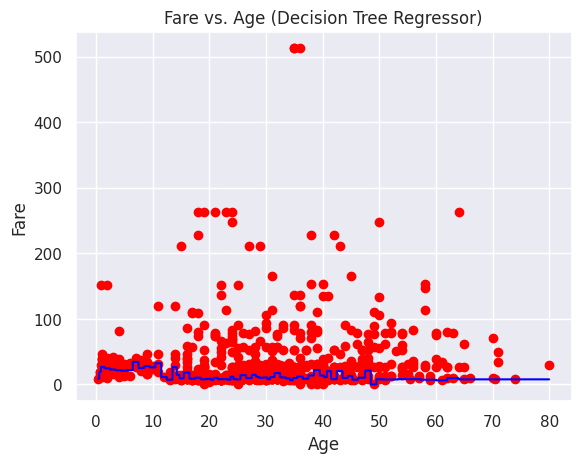

In [ ]:
# Create X_grid with the first feature varying and others constant
X_grid = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01).reshape(-1, 1)  # Varying 'Age' for prediction

# Repeat constant value of Pclass to match the shape of X_grid
constant_pclass = np.full((X_grid.shape[0], 1), 3)

X_grid = np.hstack([constant_pclass, X_grid])

# Plotting
plt.scatter(X[:, 1], y, color='red')  # Scatter plot for actual data (Age vs. Fare)
plt.plot(X_grid[:, 1], regressor.predict(X_grid), color='blue')
plt.title('Fare vs. Age (Decision Tree Regressor)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


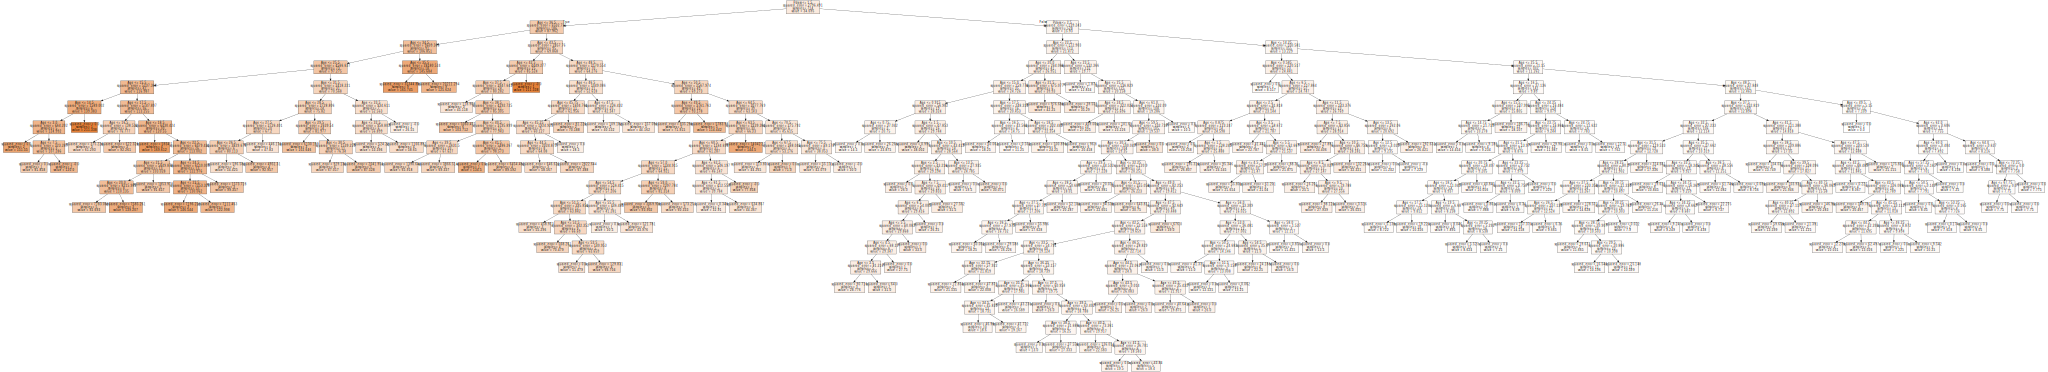

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['Pclass', 'Age'], filled=True)
graph = graphviz.Source(dot_data)
graph

##  For Decsision Tree Classifier

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Titanic Survival Dataset


This dataset represents passengers from the Titanic and classifies each individual into one of two categories: Survived or Not Survived. The goal is to predict survival based on several passenger attributes (predictor variables) including: Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked.

These attributes give insight into the factors that may have influenced a passenger's chance of survival, allowing us to model the likelihood of survival based on demographic and ticket information. This binary classification task can help identify patterns related to survival among different groups on the Titanic, such as those in different classes or of different ages and genders.





In [ ]:
import pandas as pd
import seaborn as sns

titanic_data = pd.read_csv('titanic_trains.csv', names=[
    "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
], header=0)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Given the objective of predicting passenger survival, we convert the Survived column into a binary classification task: Survived (for passengers who lived) and Not Survived (for passengers who did not survive). This approach allows us to focus on identifying factors associated with passenger survival.


---

The following code will load the dataset, convert the Survived column into Survived and Not Survived categories, and display a sample of the data.


In [ ]:
titanic_data['Survived'] = titanic_data['Survived'].replace({1: 'Survived', 0: 'Not Survived'})
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Not Survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Not Survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,Not Survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


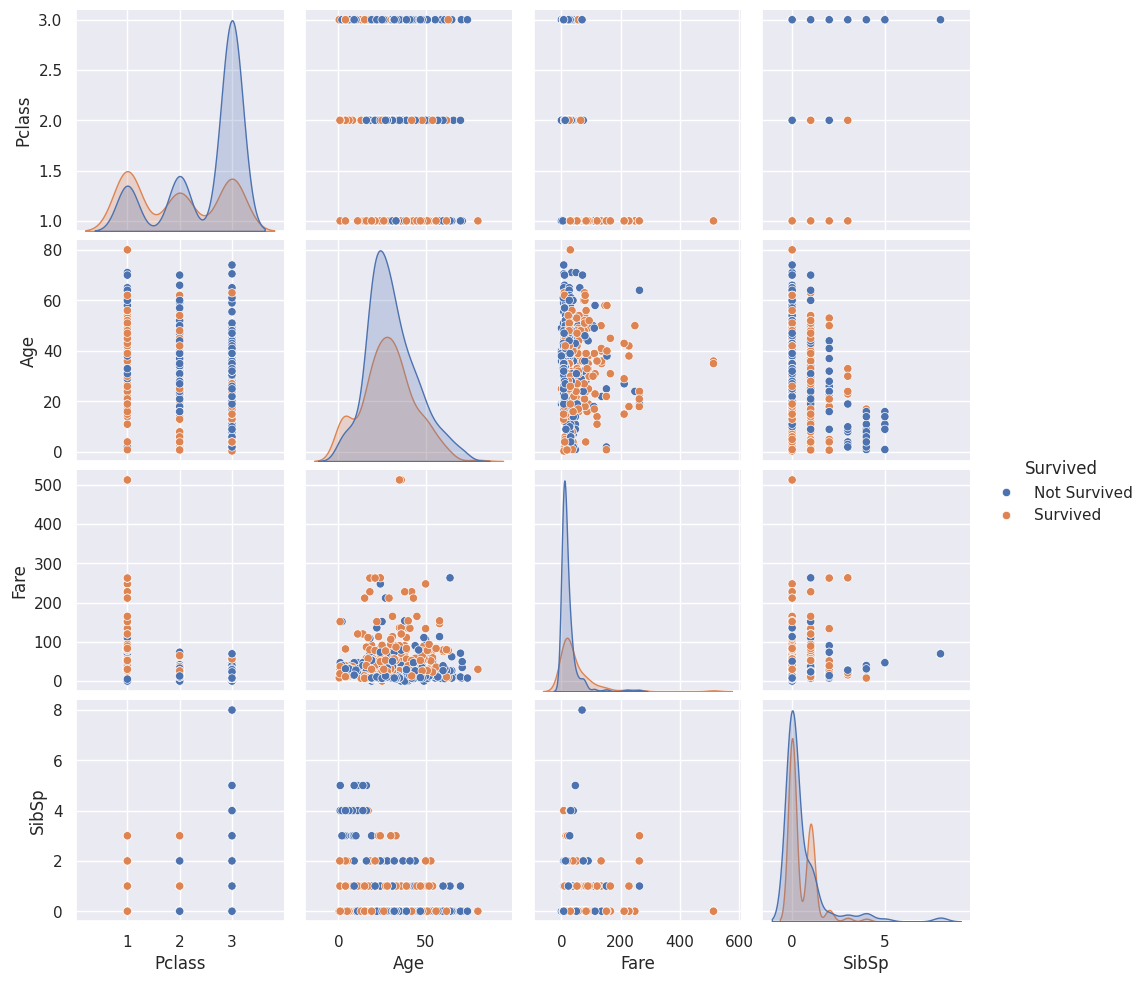

In [ ]:
# Paired plot using seaborn
sns.set()
sns.pairplot(titanic_data[['Pclass', 'Age', 'Fare', 'SibSp', 'Survived']], hue='Survived', diag_kind="kde")
plt.show()

We can apply Pandas cross-tabulation to examine the relationship between the Pclass and Survived attributes

In [ ]:
pd.crosstab([titanic_data['Pclass']], titanic_data['Survived'])

Survived,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


The results above show that it is possible to distinguish passengers who survived from those who did not using these attributes. For example, passengers in lower classes and older age groups might be less likely to survive, while those in higher classes and younger age groups are more likely to survive. Such relationships can be identified using a decision tree classifier, as demonstrated in the example in the next subsection.

In this context, the decision tree helps to identify combinations of attributes, such as class and age, that are associated with survival, enabling us to better understand and predict patterns of survival among different groups on the Titanic.

## Decision Tree Classifier

In this section, we apply a decision tree classifier to the titanic dataset described in the previous subsection.

In [ ]:
from sklearn import tree

titanic_data = pd.read_csv('titanic_trains.csv', names=[
    "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
], header=0)

X = titanic_data[['Pclass', 'Age', 'Fare', 'SibSp']]  # Predictors
Y = titanic_data['Survived']  # Target

# train the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, Y)

In [ ]:
X

,Pclass,Age,Fare,SibSp
0,3,22.0,7.2500,1
1,1,38.0,71.2833,1
2,3,26.0,7.9250,0
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,0
888,3,NaN,23.4500,1
889,1,26.0,30.0000,0


The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function.

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

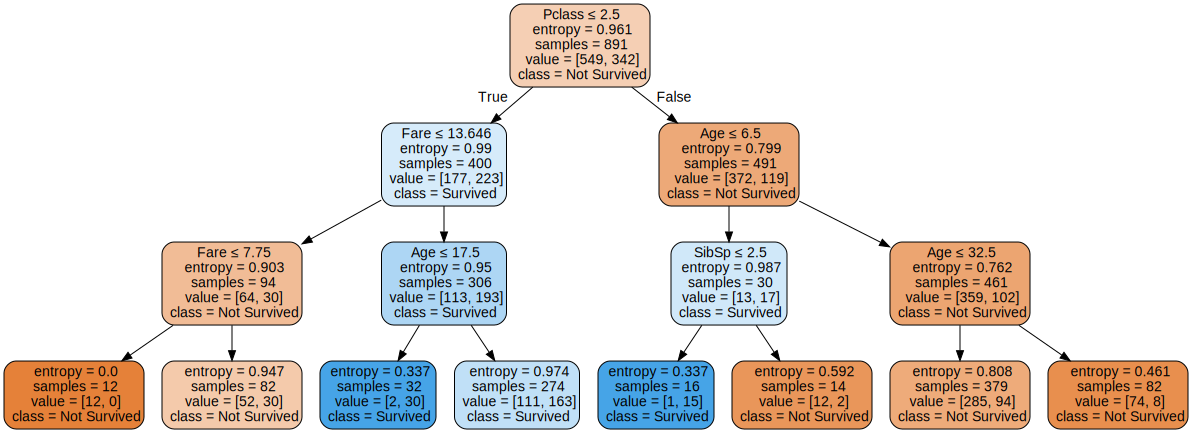

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['Not Survived', 'Survived'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Next, suppose we apply the decision tree to classify the following test examples.

In [ ]:
test_data = [
    ['Passenger 1', 3, 22, 7.25, 1, 'Not Survived'],
    ['Passenger 2', 1, 38, 71.2833, 1, 'Survived'],
    ['Passenger 3', 3, 26, 7.925, 0, 'Not Survived'],
    ['Passenger 4', 1, 35, 53.1, 1, 'Survived']
]
test_data = pd.DataFrame(test_data, columns=['Name', 'Pclass', 'Age', 'Fare', 'SibSp', 'Survived'])
test_data

,Name,Pclass,Age,Fare,SibSp,Survived
0,Passenger 1,3,22,7.2500,1,Not Survived
1,Passenger 2,1,38,71.2833,1,Survived
2,Passenger 3,3,26,7.9250,0,Not Survived
3,Passenger 4,1,35,53.1000,1,Survived


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [ ]:
# Prepare test data for predictions
test_Y = test_data['Survived'].replace({'Not Survived': 0, 'Survived': 1})
test_X = test_data[['Pclass', 'Age', 'Fare', 'SibSp']]

pred_Y = clf.predict(test_X)
predictions = pd.concat([test_data['Name'], pd.Series(pred_Y, name='Predicted Survived')], axis=1)
print(predictions)

          Name  Predicted Survived
0  Passenger 1                   0
1  Passenger 2                   1
2  Passenger 3                   0
3  Passenger 4                   1


<ipython-input-117-fa0ba71e2d42>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_Y = test_data['Survived'].replace({'Not Survived': 0, 'Survived': 1})


Confusion Matrix:
 [[2 0]
 [0 2]]


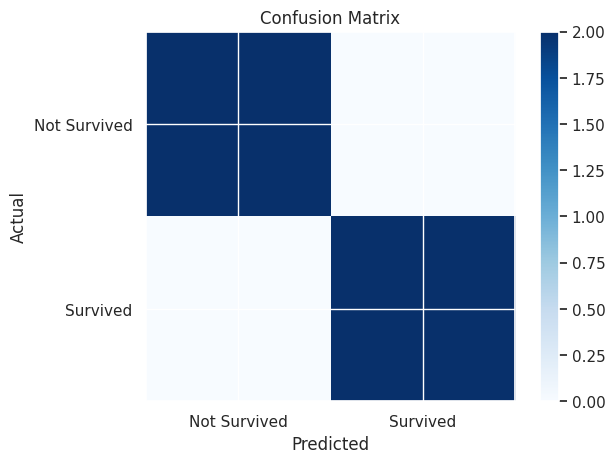

Accuracy on test data is 1.00
F1 score on test data is 1.00
Precision Score on test data is 1.00
Recall score on test data is 1.00
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00         2
    Survived       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
import matplotlib.pyplot as plt

confusion = confusion_matrix(test_Y, pred_Y)
print("Confusion Matrix:\n", confusion)

plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('Accuracy on test data is %.2f' % accuracy_score(test_Y, pred_Y))
print('F1 score on test data is %.2f' % f1_score(test_Y, pred_Y))
print('Precision Score on test data is %.2f' % precision_score(test_Y, pred_Y))
print('Recall score on test data is %.2f' % recall_score(test_Y, pred_Y))
print(classification_report(test_Y, pred_Y, target_names=['Not Survived', 'Survived']))


In [ ]:
list(titanic_data['Survived'].unique())

[0, 1]

## Logistic Regression

In this section, we apply a Logistic Regression to the customer churn dataset described in the previous subsection.

Predictions for C=0.01 on test data: [0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
Predictions for C=0.1 on test data: [0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
Predictions for C=0.2 on test data: [0 1 1 1 0 0 0 1 

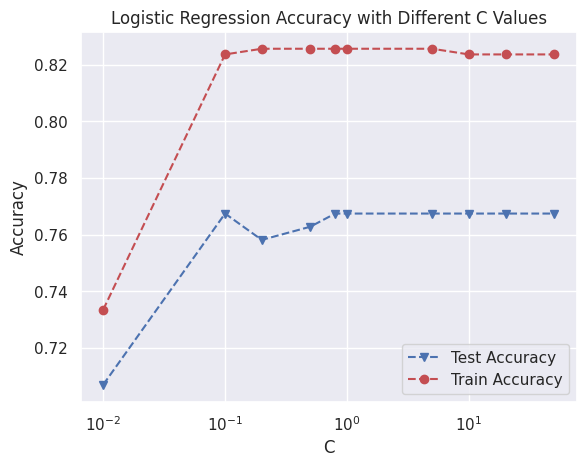

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Titanic dataset
data = pd.read_csv('titanic_trains.csv', names=[
    "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
], header=0)

# Preprocessing: Select relevant features, drop missing values, and encode categorical data
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode Sex as binary values

# Define X and Y
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
Y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Logistic Regression with varying C values
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param, max_iter=1000)
    clf.fit(X_train, Y_train)
    log_reg_pred = clf.predict(X_test)
    log_reg_pred_train = clf.predict(X_train)
    print(f"Predictions for C={param} on test data: {log_reg_pred}")
    LRtestAcc.append(accuracy_score(Y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y_train, log_reg_pred_train))

# Plotting Train and Test Accuracy
plt.plot(C, LRtestAcc, 'bv--', C, LRtrainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy with Different C Values')
plt.show()


## Naive Bayes Classifier

In this section, we apply a Naise Bayes classifier to the customer churn dataset described in the previous subsection.

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Train the Naive Bayes Classifier
clf_NB = GaussianNB()
clf_NB.fit(X_train, Y_train)
NB_pred = clf_NB.predict(X_test)

print('Naive Bayes Accuracy:', accuracy_score(Y_test, NB_pred))


Naive Bayes Accuracy: 0.7674418604651163


## Support Vector Machine (SVM) Classifier

In this section, we apply a SVM classifier to the titanic dataset described in the previous subsection. We will also experiment with C-parameter and different kernals and see how it effects the performance of the model.

### Linear Decision Boundary

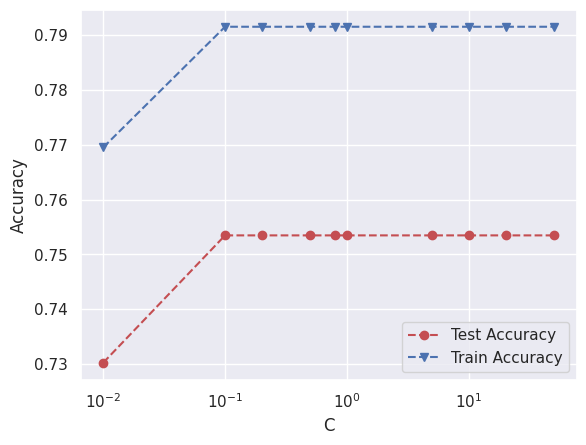

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []
for param in C:
    clf = SVC(C=param, kernel='linear')
    clf.fit(X_train, Y_train)
    SVMLtestAcc.append(accuracy_score(Y_test, clf.predict(X_test)))
    SVMLtrainAcc.append(accuracy_score(Y_train, clf.predict(X_train)))

plt.plot(C, SVMLtestAcc, 'ro--', C, SVMLtrainAcc, 'bv--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

### Non Linear Decision Boundary

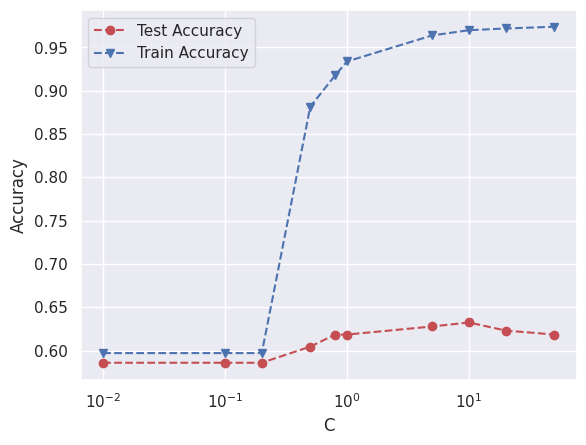

In [ ]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]


SVMLtestAcc = []
SVMLtrainAcc = []
for param in C:
    clf = SVC(C=param, kernel='rbf', gamma='auto')
    clf.fit(X_train, Y_train)
    SVMLtestAcc.append(accuracy_score(Y_test, clf.predict(X_test)))
    SVMLtrainAcc.append(accuracy_score(Y_train, clf.predict(X_train)))

plt.plot(C, SVMLtestAcc, 'ro--', C, SVMLtrainAcc, 'bv--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

## K Nearest Neighbor (KNN) Classifier

In this section, we apply a K - Nearest Neighbor classifier to the titanic dataset described in the previous subsection. We will also look at how the K value effect the performance of the Model.

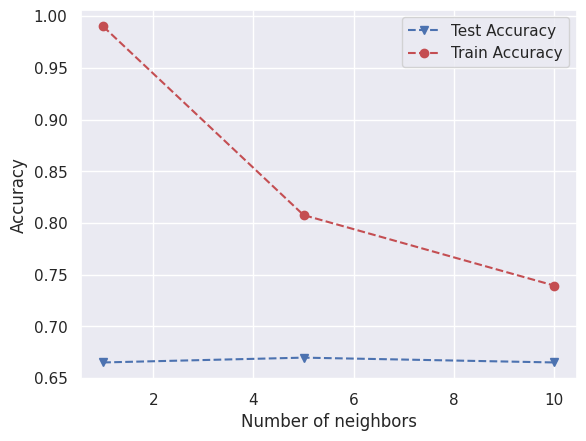

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    testAcc.append(accuracy_score(Y_test, clf.predict(X_test)))
    trainAcc.append(accuracy_score(Y_train, clf.predict(X_train)))

plt.plot(numNeighbors, testAcc, 'bv--', numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Artificial Neural Network

In [ ]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing
from collections.abc import Sequence

In [ ]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = [x for x in df.columns if x != target]
    target_type = df[target].dtype
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [ ]:
data_df = pd.read_csv('titanic_trains.csv', names=[
    "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
], header=0)

data_df = data_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].dropna()

In [ ]:
data_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,0
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
889,1,male,26.0,0,0,30.0000,C,1


In [ ]:
testData = pd.DataFrame([
    [3, 'male', 22, 1, 0, 7.25, 'S'],
    [1, 'female', 38, 1, 0, 71.2833, 'C'],
    [3, 'female', 26, 0, 0, 7.925, 'S'],
    [1, 'female', 35, 1, 0, 53.1, 'S']
], columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

testData = pd.DataFrame(testData, columns=data.columns)
testData

,Pclass,Sex,Age,Fare,Survived
0,3,male,22,7.2500,NaN
1,1,female,38,71.2833,NaN
2,3,female,26,7.9250,NaN
3,1,female,35,53.1000,NaN


In [ ]:
encode_text_dummy(data_df, 'Sex')
encode_text_dummy(data_df, 'Embarked')

In [ ]:
testData

,Pclass,Sex,Age,Fare,Survived
0,3,male,22,7.2500,NaN
1,1,female,38,71.2833,NaN
2,3,female,26,7.9250,NaN
3,1,female,35,53.1000,NaN


In [ ]:
data_df['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [ ]:
for col in data_df.columns:
    if col not in testData.columns:
        testData[col] = 0

# Ensure columns in testData match the order of features in data_df
testData = testData[data_df.columns.drop('Survived')]

# Convert training data to X, Y format
X, Y = to_xy(data_df, 'Survived')

testX = testData.values.astype(np.float32)
testY = np.array([[1, 0], [0, 1], [0, 1], [0, 1]], dtype=np.float32)  # Example one-hot labels for 'Not Survived' and 'Survived'



<ipython-input-166-f5a73eb88a29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData[col] = 0


In [ ]:
print(X.shape)
print(Y.shape)
Y

(712, 10)
(712, 2)


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 - 1s - 58ms/step - loss: 0.7807
Epoch 2/100
23/23 - 0s - 8ms/step - loss: 0.6685
Epoch 3/100
23/23 - 0s - 3ms/step - loss: 0.6234
Epoch 4/100
23/23 - 0s - 3ms/step - loss: 0.6035
Epoch 5/100
23/23 - 0s - 3ms/step - loss: 0.6016
Epoch 6/100
23/23 - 0s - 3ms/step - loss: 0.5961
Epoch 7/100
23/23 - 0s - 2ms/step - loss: 0.5948
Epoch 8/100
23/23 - 0s - 3ms/step - loss: 0.5957
Epoch 9/100
23/23 - 0s - 3ms/step - loss: 0.5873
Epoch 10/100
23/23 - 0s - 2ms/step - loss: 0.5840
Epoch 11/100
23/23 - 0s - 3ms/step - loss: 0.5829
Epoch 12/100
23/23 - 0s - 3ms/step - loss: 0.5779
Epoch 13/100
23/23 - 0s - 3ms/step - loss: 0.5759
Epoch 14/100
23/23 - 0s - 5ms/step - loss: 0.5721
Epoch 15/100
23/23 - 0s - 6ms/step - loss: 0.5689
Epoch 16/100
23/23 - 0s - 6ms/step - loss: 0.5665
Epoch 17/100
23/23 - 0s - 6ms/step - loss: 0.5674
Epoch 18/100
23/23 - 0s - 3ms/step - loss: 0.5634
Epoch 19/100
23/23 - 0s - 6ms/step - loss: 0.5611
Epoch 20/100
23/23 - 0s - 3ms/step - loss: 0.5581
Epoch 21

In [ ]:
pred = model.predict(testX)
print(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[0.5350868 0.4649132]


In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
true = np.argmax(testY, axis=1)

In [ ]:
print('Accuracy on test data is %.2f' % accuracy_score(true, pred))


Accuracy on test data is 0.75


In [ ]:
print(classification_report(true, pred, target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.50      1.00      0.67         1
    Survived       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

